In [46]:
%matplotlib notebook

In [132]:
# Import Dependencies Libraries
import os
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from pylab import rcParams
from pandas import Series
import datetime
from scipy.stats import linregress
from sklearn import datasets

In [109]:
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [110]:
sns.set(font_scale=1.5, style="whitegrid")

In [232]:
#Read in the China Data CSV to Dataframe
from pandas import read_csv
China_data_df_mo = read_csv('china.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
#China_data_df_mo

#Read in Germany_Global Data
German_results_df = read_csv('Germany_glob.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
German_results_df.head()

# Combine the data into a single dataset - outer to display all groups
combined_data = pd.merge(China_data_df_mo, German_results_df, how="outer", on = "Binning group#")
#print(combined_data)

#drop Nan values where columns allow
combined_data.dropna(how='all', inplace=True)
combined_data

,ID_x,China -Online Retail Sales Accumulated(in billion $US dollars),China - Online Retail Sales in Goods Accumulated(in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars),China - Total Retail Sales of Consumer Goods Accumulated (in billion $US dollars),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),China - Total Retail Sales of Consumer Goods Accumulated Growth Rate (%),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%).1,China - Online Retail Sales Accumulated Growth Rate(%),China - Online Retail Sales in Goods Accumulated Growth Rate(%),China - Online Retail Sales in Food Accumulated Growth Rate(%),China - Online Retail Sales in Clothing Accumulated Growth Rate(%),China - Online Retail Sales in Necessities Accumulated Growth Rate(%),Date,ID_y,Germany B2C e_Commerce sales (in billion $US dollars),Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars)
Binning group#,,,,,,,,,,,,,,,,,,
y_2010,x_2010,NaN,NaN,181.253274,1812.532740,1812.532740,1.995224,1.995224,NaN,NaN,NaN,NaN,NaN,1/1/2010,NaN,NaN,NaN,NaN
y_2010,x_2010,NaN,NaN,175.782085,1757.820847,3570.353587,3.149604,2.551036,NaN,NaN,NaN,NaN,NaN,2/1/2010,NaN,NaN,NaN,NaN
y_2010,x_2010,NaN,NaN,161.352340,1613.523397,5183.876984,2.565288,2.551036,NaN,NaN,NaN,NaN,NaN,3/1/2010,NaN,NaN,NaN,NaN
y_2010,x_2010,NaN,NaN,164.041617,1640.416166,6824.293150,2.636546,2.579540,NaN,NaN,NaN,NaN,NaN,4/1/2010,NaN,NaN,NaN,NaN
y_2010,x_2010,NaN,NaN,177.505103,1775.051032,8599.344182,2.665049,2.593791,NaN,NaN,NaN,NaN,NaN,5/1/2010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y_2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x_2021,NaN,"4,206",374.38
y_2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x_2022,NaN,"4,927",407.07
y_2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x_2023,NaN,"5,695",436.12


In [233]:
now = datetime.datetime.now()
date_string = now.strftime('%Y')
print(date_string)
combined_data

2020


,ID_x,China -Online Retail Sales Accumulated(in billion $US dollars),China - Online Retail Sales in Goods Accumulated(in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars),China - Total Retail Sales of Consumer Goods Accumulated (in billion $US dollars),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),China - Total Retail Sales of Consumer Goods Accumulated Growth Rate (%),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%).1,China - Online Retail Sales Accumulated Growth Rate(%),China - Online Retail Sales in Goods Accumulated Growth Rate(%),China - Online Retail Sales in Food Accumulated Growth Rate(%),China - Online Retail Sales in Clothing Accumulated Growth Rate(%),China - Online Retail Sales in Necessities Accumulated Growth Rate(%),Date,ID_y,Germany B2C e_Commerce sales (in billion $US dollars),Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars)
Binning group#,,,,,,,,,,,,,,,,,,
y_2010,x_2010,NaN,NaN,181.253274,1812.532740,1812.532740,1.995224,1.995224,NaN,NaN,NaN,NaN,NaN,1/1/2010,NaN,NaN,NaN,NaN
y_2010,x_2010,NaN,NaN,175.782085,1757.820847,3570.353587,3.149604,2.551036,NaN,NaN,NaN,NaN,NaN,2/1/2010,NaN,NaN,NaN,NaN
y_2010,x_2010,NaN,NaN,161.352340,1613.523397,5183.876984,2.565288,2.551036,NaN,NaN,NaN,NaN,NaN,3/1/2010,NaN,NaN,NaN,NaN
y_2010,x_2010,NaN,NaN,164.041617,1640.416166,6824.293150,2.636546,2.579540,NaN,NaN,NaN,NaN,NaN,4/1/2010,NaN,NaN,NaN,NaN
y_2010,x_2010,NaN,NaN,177.505103,1775.051032,8599.344182,2.665049,2.593791,NaN,NaN,NaN,NaN,NaN,5/1/2010,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
y_2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x_2021,NaN,"4,206",374.38
y_2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x_2022,NaN,"4,927",407.07
y_2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x_2023,NaN,"5,695",436.12


In [234]:
# Remove unecessary columns from the DataFrame and save the new DataFrame
# Only keep: "isbn", "original_publication_year", "original_title", "authors",
# "ratings_1", "ratings_2", "ratings_3", "ratings_4", "ratings_5"
reduced_df = combined_data[["ID_x", "China -Online Retail Sales Accumulated(in billion $US dollars)", "China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars)",
                       "Germany B2C e_Commerce sales (in billion $US dollars)", "Global retail e-commerce sales (in billion $US dollars)", "US Retail e-commerce sales (billion $US dollars)", "Date"]]
reduced_df

,ID_x,China -Online Retail Sales Accumulated(in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars),Germany B2C e_Commerce sales (in billion $US dollars),Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars),Date
Binning group#,,,,,,,
y_2010,x_2010,NaN,181.253274,NaN,NaN,NaN,1/1/2010
y_2010,x_2010,NaN,175.782085,NaN,NaN,NaN,2/1/2010
y_2010,x_2010,NaN,161.352340,NaN,NaN,NaN,3/1/2010
y_2010,x_2010,NaN,164.041617,NaN,NaN,NaN,4/1/2010
y_2010,x_2010,NaN,177.505103,NaN,NaN,NaN,5/1/2010
...,...,...,...,...,...,...,...
y_2021,NaN,NaN,NaN,NaN,"4,206",374.38,NaN
y_2022,NaN,NaN,NaN,NaN,"4,927",407.07,NaN
y_2023,NaN,NaN,NaN,NaN,"5,695",436.12,NaN


In [235]:
#Create summary table grouping monthly data into Years
summarystats = pd.DataFrame(reduced_df.groupby("Binning group#").count())
summarystats

,ID_x,China -Online Retail Sales Accumulated(in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars),Germany B2C e_Commerce sales (in billion $US dollars),Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars),Date
Binning group#,,,,,,,
y_2010,12,0,12,0,0,0,12
y_2011,12,0,12,12,0,0,12
y_2012,12,0,10,12,0,0,12
y_2013,12,0,10,12,0,0,12
y_2014,12,0,10,12,0,0,12
y_2015,12,0,10,12,12,0,12
y_2016,12,0,10,12,12,0,12
y_2017,12,0,10,12,12,0,12
y_2018,12,11,10,12,12,12,12


In [236]:
#Use groupby to create summary stats based on year; add results into columns in summary table
summarystats["Mean"] = pd.DataFrame(combined_data.groupby("Binning group#")["China -Online Retail Sales Accumulated(in billion $US dollars)"].mean())
summarystats["Median"] = pd.DataFrame(combined_data.groupby("Binning group#")["China -Online Retail Sales Accumulated(in billion $US dollars)"].median())
summarystats["Standard Deviation"] = pd.DataFrame(combined_data.groupby("Binning group#")["China -Online Retail Sales Accumulated(in billion $US dollars)"].std())
summarystats["Variance"] = pd.DataFrame(combined_data.groupby("Binning group#")["China -Online Retail Sales Accumulated(in billion $US dollars)"].var())
summarystats["SEM"] = pd.DataFrame(combined_data.groupby("Binning group#")["China -Online Retail Sales Accumulated(in billion $US dollars)"].sem())
summarystats

#Display 5 summarystats (mean, median, stand dev, var, SEM and keep Year column
summarystats = summarystats[["ID_x", "Mean", "Median", "Standard Deviation", "Variance", "SEM"]]
summarystats

#Rename Mouse ID_x count column (can rename any column) to Year
summarystats = summarystats.rename(columns = {"ID_x" : "Year"})
summarystats

,Year,Mean,Median,Standard Deviation,Variance,SEM
Binning group#,,,,,,
y_2010,12,NaN,NaN,NaN,NaN,NaN
y_2011,12,NaN,NaN,NaN,NaN,NaN
y_2012,12,NaN,NaN,NaN,NaN,NaN
y_2013,12,NaN,NaN,NaN,NaN,NaN
y_2014,12,NaN,NaN,NaN,NaN,NaN
y_2015,12,NaN,NaN,NaN,NaN,NaN
y_2016,12,NaN,NaN,NaN,NaN,NaN
y_2017,12,NaN,NaN,NaN,NaN,NaN
y_2018,12,697.055344,682.120055,362.947024,131730.542468,109.432645


In [237]:
# Generate a bar plot showing the total China retail sales (data avail 2017-2019) 
China_Online_Retail_Sales = summarystats[["Mean"]]
China_Online_Retail_Sales.head

<bound method NDFrame.head of                       Mean
Binning group#            
y_2010                 NaN
y_2011                 NaN
y_2012                 NaN
y_2013                 NaN
y_2014                 NaN
y_2015                 NaN
y_2016                 NaN
y_2017                 NaN
y_2018          697.055344
y_2019          817.257095
y_2020          451.078817
y_2021                 NaN
y_2022                 NaN
y_2023                 NaN
y_2024                 NaN
y_2025                 NaN>

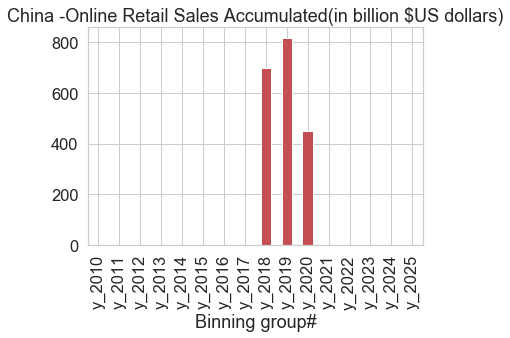

<Figure size 432x288 with 0 Axes>

In [238]:
#Create a bar chart of the data
China_Online_Retail_Sales.plot(kind="bar", figsize=(6,4), color = "r", legend=False)

# Set a title for the chart
plt.title("China -Online Retail Sales Accumulated(in billion $US dollars)")

plt.show()
plt.savefig('China Online Retail Sales 2018 - 2020')
plt.tight_layout()

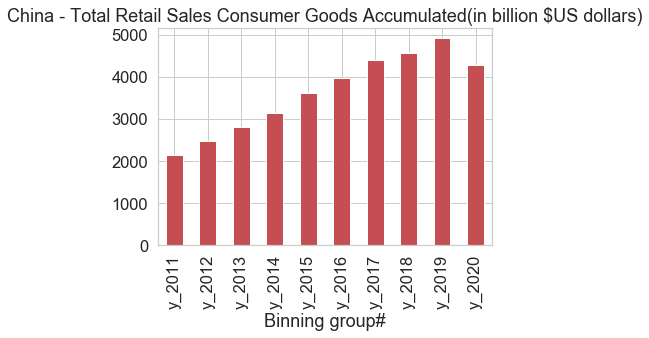

<Figure size 432x288 with 0 Axes>

In [239]:
#Use groupby to create summary stats based on year; add results into columns in summary table
summarystats2["Mean"] = pd.DataFrame(combined_data.groupby("Binning group#")["China - Total Retail Sales of Consumer Goods Accumulated (in billion $US dollars)"].mean())
summarystats2

China_Retail_Sales = summarystats2[["Mean"]]
#China_Retail_Sales.head

#Create a bar chart of the data
China_Retail_Sales.plot(kind="bar", figsize=(6,4), color = "r", legend=False)

# Set a title for the chart
plt.title("China - Total Retail Sales Consumer Goods Accumulated(in billion $US dollars)")

plt.show()
plt.savefig('China Total Retails Sales 2011 - 2020')
plt.tight_layout()

In [242]:
#Use groupby to create summary stats based on year; add results into columns in summary table
German_results=German_results_df['Germany B2C e_Commerce sales (in billion $US dollars)']
German_results

mean_numpy = np.mean(German_results)
print(f"The mean e-Commerce Sales for Germany is {mean_numpy}")

The mean e-Commerce Sales for Germany is 38.57


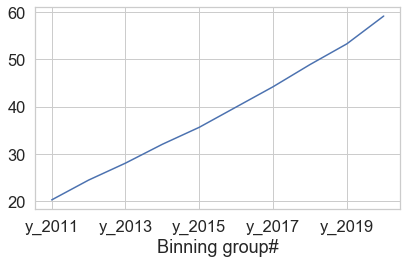

In [187]:
German_results.plot(y=["Germany B2C e_Commerce sales (in billion $US dollars)","Global retail e-commerce sales (in billion $US dollars)"], x="Date")
plt.savefig('German B2C eCommerce Sales 2011 - 2025')
plt.tight_layout()

In [246]:
print(combined_data.describe())

       China -Online Retail Sales Accumulated(in billion $US dollars)  \
count                                          27.000000                
mean                                          700.475219                
std                                           381.565893                
min                                           174.885659                
25%                                           400.689435                
50%                                           682.120055                
75%                                           961.499158                
max                                          1515.289969                

       China - Online Retail Sales in Goods Accumulated(in billion $US dollars)  \
count                                          27.000000                          
mean                                          552.010073                          
std                                           301.791275                          
min       

In [247]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM for each Year (binning group#)
#Create summary table displaying # of data points for each Year
summarystats = pd.DataFrame(combined_data.groupby("Binning group#").count())
summarystats = pd.DataFrame(combined_data.groupby("Binning group#").mean())
summarystats = pd.DataFrame(combined_data.groupby("Binning group#").median())
summarystats

#Rename columns
summarystats = summarystats.rename(columns = {"Online Retail Sales Accumulated(in billion $US dollars)" : "China-Online Retail Sales Accumulated(in billion $US dollars)"})
summarystats

,China -Online Retail Sales Accumulated(in billion $US dollars),China - Online Retail Sales in Goods Accumulated(in billion $US dollars),China - Total Retail Sales of Consumer Goods Current Period(in billion $US dollars),China - Total Retail Sales of Consumer Goods Accumulated (in billion $US dollars),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),China - Total Retail Sales of Consumer Goods Accumulated Growth Rate (%),China - Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%).1,China - Online Retail Sales Accumulated Growth Rate(%),China - Online Retail Sales in Goods Accumulated Growth Rate(%),China - Online Retail Sales in Food Accumulated Growth Rate(%),China - Online Retail Sales in Clothing Accumulated Growth Rate(%),China - Online Retail Sales in Necessities Accumulated Growth Rate(%),Germany B2C e_Commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars)
Binning group#,,,,,,,,,,,,,,
y_2010,NaN,NaN,178.322432,1783.224324,11229.662235,2.643672,2.593791,NaN,NaN,NaN,NaN,NaN,NaN,NaN
y_2011,NaN,NaN,209.511346,2095.113465,13259.218335,2.458401,2.401395,NaN,NaN,NaN,NaN,NaN,20.2,NaN
y_2012,NaN,NaN,237.814311,2378.143115,16323.283830,2.016601,2.037979,NaN,NaN,NaN,NaN,NaN,24.4,NaN
y_2013,NaN,NaN,269.159281,2691.592805,18424.112190,1.895463,1.824205,NaN,NaN,NaN,NaN,NaN,28.0,NaN
y_2014,NaN,NaN,302.249358,3022.493580,20661.185840,1.695940,1.710192,NaN,NaN,NaN,NaN,NaN,32.0,NaN
y_2015,NaN,NaN,350.818811,3508.188108,23645.670400,1.524921,1.496418,NaN,NaN,NaN,NaN,NaN,35.6,NaN
y_2016,NaN,NaN,387.622143,3876.221426,26075.553950,1.503544,1.467915,NaN,NaN,NaN,NaN,NaN,39.9,NaN
y_2017,NaN,NaN,428.526372,4285.263724,28785.167910,1.475041,1.467915,NaN,NaN,NaN,NaN,NaN,44.2,NaN
y_2018,682.120055,519.626162,444.535195,4445.351946,30035.475030,1.268392,1.325399,4.175719,4.147216,6.042678,3.406132,4.232725,48.9,279.72


In [ ]:
#Create figure and plot space
fig, ax = plt.subplots(figsize=(20,20))

#Add x-axis and y-axis
ax.scatter(China_data_df_mo.index.values, 
           China_data_df_mo['Online Retail Sales Accumulated($US)'], color='purple')

#Set title and labels for axes
ax.set(xlabel="Date",
      ylabel="Online Retail Sales Accumulated($US)", title="Online Retail Sales Accumulated($US) - 2010-2020")
    
plt.show()

#Use groupby to create summary stats based on year; add results into columns in summary table
German_results=German_results_df['Global retail e-commerce sales (in billion $US dollars)']
German_results

German_results.plot(y=["Global retail e-commerce sales (in billion $US dollars)","Global retail e-commerce sales (in billion $US dollars)"], x="Date")
plt.savefig('German B2C eCommerce Sales 2011 - 2025')
plt.tight_layout()s

In [91]:
#Select 2 colums of interest
cap_single_df = cap_single_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
#capomulin_df.index
#Reset the index
cap_single_df = cap_single_df.reset_index(drop=True)
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_single_df.set_index('Timepoint').plot(figsize=(10, 8), linewidth=2.5, color='blue')

NameError: name 'cap_single_df' is not defined

In [92]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Pull values for x and y values
mouse_weight = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Weight (g)"].mean()
tumor_volume = Capomulin_df.groupby(Capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

# Create Scatter Plot with values calculated above
plt.scatter(mouse_weight,tumor_volume)
plt.xlabel("Weight of Mouse")
plt.ylabel("Tumor Volume")
plt.show()

NameError: name 'Capomulin_df' is not defined

In [9]:
print(China_data_df_mo.describe())

       Binning group#  \
count          126.00   
mean             5.26   
std              3.05   
min              0.50   
25%              2.50   
50%              5.50   
75%              7.50   
max             10.50   

       Online Retail Sales Accumulated(in billion $US dollars)  \
count                                              27.00         
mean                                              700.48         
std                                               381.57         
min                                               174.89         
25%                                               400.69         
50%                                               682.12         
75%                                               961.50         
max                                             1,515.29         

       Online Retail Sales Accumulated Growth Rate(%)  \
count                                           27.00   
mean                                             2.72   
std     

In [10]:
#Convert China Monthly Data into Annual Data using bin groups 
# Create the bins in which Data will be held
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

# Create the names for the five bins
China_Annual_Data = ["2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]
#China_Annual_Data

China_data_df_mo["Annual Data Summary"] = pd.cut(China_data_df_mo["Binning group#"], bins, labels=China_Annual_Data)
China_data_df_mo

,Binning group#,Online Retail Sales Accumulated(in billion $US dollars),Online Retail Sales Accumulated Growth Rate(%),Online Retail Sales in Goods Accumulated(in billion $US dollars),Online Retail Sales in Goods Accumulated Growth Rate(%),Online Retail Sales in Food Accumulated Growth Rate(%),Online Retail Sales in Clothing Accumulated Growth Rate(%),Online Retail Sales in Necessities Accumulated Growth Rate(%),Total Retail Sales of Consumer Goods Current Period(in billion $US dollars),Total Retail Sales of Consumer Goods Accumulated (in billion $US dollars),Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),Total Retail Sales of Consumer Goods Accumulated Growth Rate (%),Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%).1,Annual Data Summary
Date,,,,,,,,,,,,,,
2010-01-01,0.50,nan,nan,nan,nan,nan,nan,nan,181.25,"1,812.53","1,812.53",2.00,2.00,2010
2010-02-01,0.50,nan,nan,nan,nan,nan,nan,nan,175.78,"1,757.82","3,570.35",3.15,2.55,2010
2010-03-01,0.50,nan,nan,nan,nan,nan,nan,nan,161.35,"1,613.52","5,183.88",2.57,2.55,2010
2010-04-01,0.50,nan,nan,nan,nan,nan,nan,nan,164.04,"1,640.42","6,824.29",2.64,2.58,2010
2010-05-01,0.50,nan,nan,nan,nan,nan,nan,nan,177.51,"1,775.05","8,599.34",2.67,2.59,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-02-01,10.50,195.42,-0.43,160.09,0.43,3.76,-2.58,1.07,nan,nan,"7,429.33",nan,-2.92,2020
2020-03-01,10.50,315.94,-0.11,264.16,0.84,4.66,-2.15,1.43,376.95,"3,769.53","11,198.86",-2.25,-2.71,2020
2020-04-01,10.50,437.50,0.24,366.99,1.23,5.23,-1.71,1.77,401.58,"4,015.79","15,214.65",-1.07,-2.31,2020


In [11]:
# Creating a group based off of the bins
df = China_data_df_mo.groupby("Annual Data Summary")
df.max()

,Binning group#,Online Retail Sales Accumulated(in billion $US dollars),Online Retail Sales Accumulated Growth Rate(%),Online Retail Sales in Goods Accumulated(in billion $US dollars),Online Retail Sales in Goods Accumulated Growth Rate(%),Online Retail Sales in Food Accumulated Growth Rate(%),Online Retail Sales in Clothing Accumulated Growth Rate(%),Online Retail Sales in Necessities Accumulated Growth Rate(%),Total Retail Sales of Consumer Goods Current Period(in billion $US dollars),Total Retail Sales of Consumer Goods Accumulated (in billion $US dollars),Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%),Total Retail Sales of Consumer Goods Accumulated Growth Rate (%),Total Retail Sales of Consumer Goods Growth Rate (The same period last year=100)(%).1
Annual Data Summary,,,,,,,,,,,,,
2010,0.50,nan,nan,nan,nan,nan,nan,nan,218.47,"2,184.70","22,026.38",3.15,2.62
2011,1.50,nan,nan,nan,nan,nan,nan,nan,252.82,"2,528.19","25,827.58",2.84,2.84
2012,2.50,nan,nan,nan,nan,nan,nan,nan,289.79,"2,897.95","29,524.57",2.17,2.11
2013,3.50,nan,nan,nan,nan,nan,nan,nan,328.64,"3,286.38","33,402.90",1.95,1.87
2014,4.50,nan,nan,nan,nan,nan,nan,nan,367.71,"3,677.10","37,395.36",1.78,1.72
2015,5.50,nan,nan,nan,nan,nan,nan,nan,408.09,"4,080.89","42,887.45",1.60,1.52
2016,6.50,nan,nan,nan,nan,nan,nan,nan,452.59,"4,525.88","47,360.35",1.55,1.48
2017,7.50,nan,nan,nan,nan,nan,nan,nan,495.02,"4,950.16","52,198.14",1.57,1.48
2018,8.50,"1,283.57",5.32,"1,000.44",5.07,8.17,5.24,4.75,511.54,"5,115.40","54,296.73",1.44,1.40


                    Binning group#                                           \
                             count  mean  std   min   25%   50%   75%   max   
Annual Data Summary                                                           
2010                         12.00  0.50 0.00  0.50  0.50  0.50  0.50  0.50   
2011                         12.00  1.50 0.00  1.50  1.50  1.50  1.50  1.50   
2012                         12.00  2.50 0.00  2.50  2.50  2.50  2.50  2.50   
2013                         12.00  3.50 0.00  3.50  3.50  3.50  3.50  3.50   
2014                         12.00  4.50 0.00  4.50  4.50  4.50  4.50  4.50   
2015                         12.00  5.50 0.00  5.50  5.50  5.50  5.50  5.50   
2016                         12.00  6.50 0.00  6.50  6.50  6.50  6.50  6.50   
2017                         12.00  7.50 0.00  7.50  7.50  7.50  7.50  7.50   
2018                         12.00  8.50 0.00  8.50  8.50  8.50  8.50  8.50   
2019                         12.00  9.50 0.00  9.50 

SyntaxError: invalid syntax (<ipython-input-30-ac0b7cab992b>, line 2)

In [13]:
#Read in Germany_Global Data
German_results_df = read_csv('Germany_glob.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
German_results_df.head()

,Binning group#,Germany B2C e_Commerce sales (in billion $US dollars),Global retail e-commerce sales (in billion $US dollars),US Retail e-commerce sales (billion $US dollars)
Annual Data Summary,,,,
2011-01-01,1.50,20.20,NaN,nan
2012-01-01,2.50,24.40,NaN,nan
2013-01-01,3.50,28.00,NaN,nan
2014-01-01,4.50,32.00,NaN,nan
2015-01-01,5.50,35.60,"1,336",nan


In [ ]:
# Combine the data into a single dataset - outer merge for duplicates
df.merge(pd.DataFrame(data = [s.values] * len(s), columns = s.index), left_index=True, right_index=True)

In [ ]:
#Group German Date into Annual format to merge with China file on Date
# Create the bins in which Data will be held
bins = [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

# Create the names for the  bins
German_annual_data = ["2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023", "2024", "2025"]
German_annual_data

German_results_df["Annual Data Summary"] = pd.cut(German_results_df["Bin Group#"], bins, labels=German_annual_data)
#German_results_df

# Creating a group based off of the bins
df2= German_results_df.groupby("Annual Data Summary")
df2.max()

In [ ]:
#Merge 2 files on Annual Data Summary field for summary stats and graphing/plotting
df['Annual Data Summary'].value_counts()
df2['Annual Data Summary'].value_counts()
df = pd.concat([df2], axis=1) merge(`df2`)

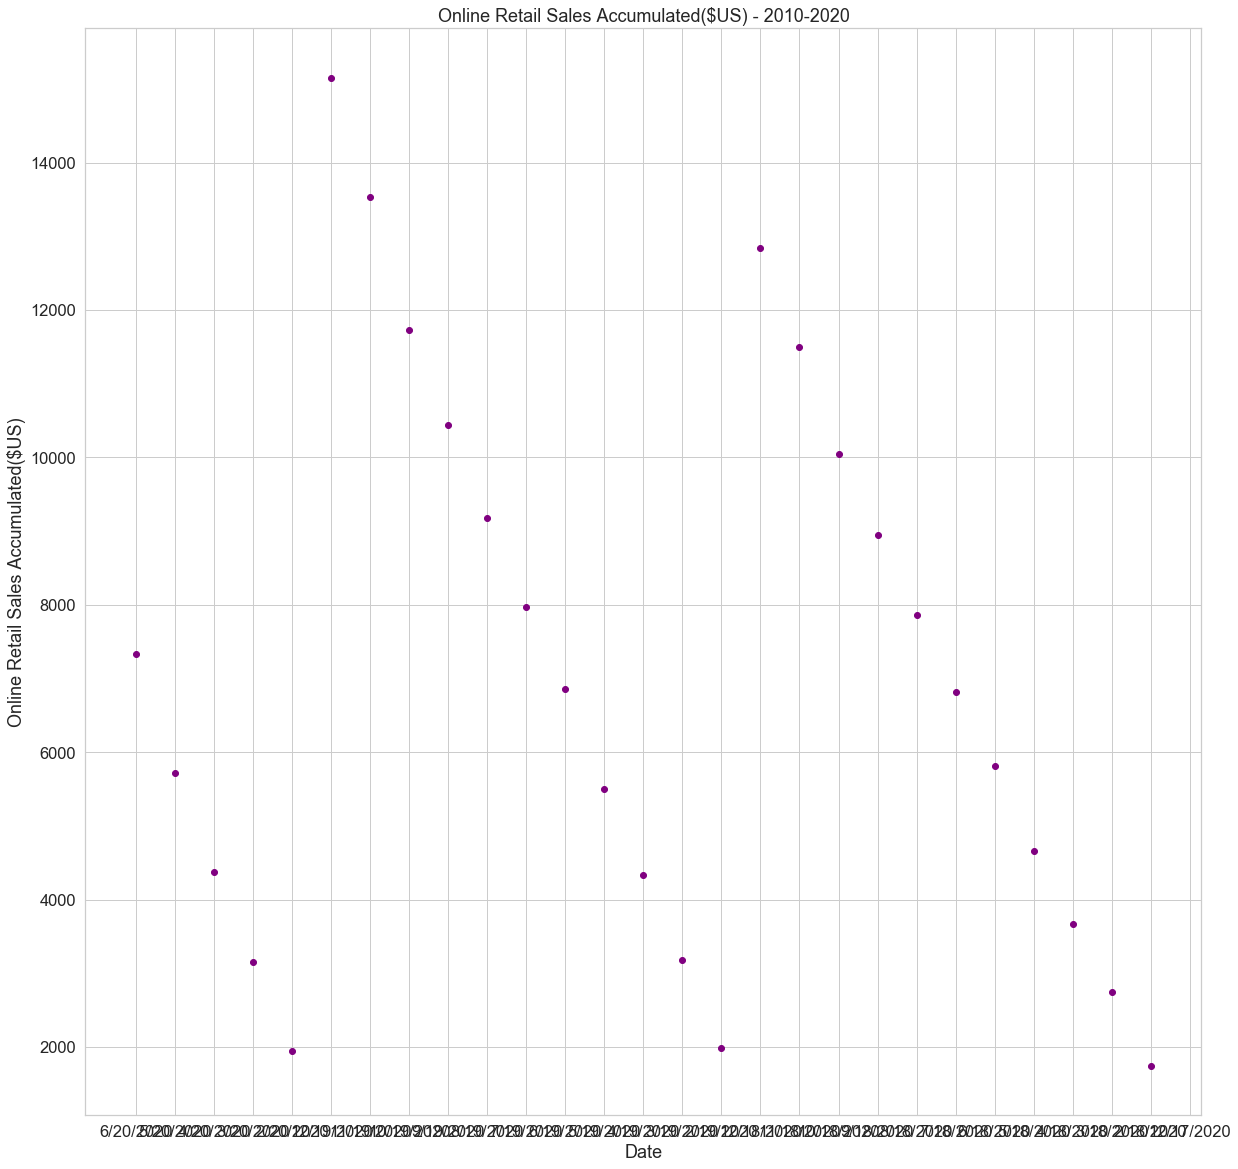

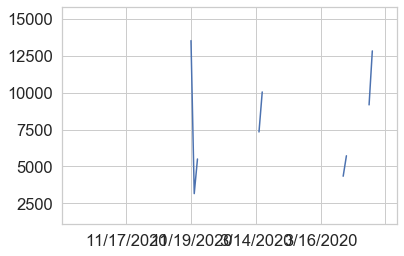

In [32]:
China_data_df2 = China_data_df_mo.sample(n=100, random_state=100, axis=0)
plt.xlabel=('Date')
plt.ylabel=('Online Retail Sales Accumulated($US)')

plt.title=('China Ecommerce Trends')
China_data_df2['Online Retail Sales Accumulated($US)'].plot()

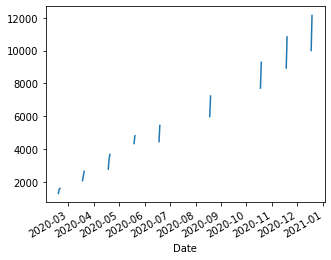

In [25]:
China_data_df3 = China_data_df.sample(n=100, random_state=120, axis=0)
plt.xlabel=('Date')
plt.ylabel=('Online Retail Sales in Goods Accumulated($US)')

plt.title=('China Ecommerce Trends')
China_data_df3['Online Retail Sales in Goods Accumulated($US)'].plot()

In [ ]:
China_data_df4 = China_data_df.sample(n=100, random_state=120, axis=0)
plt.xlabel=('Date')
plt.ylabel=('Total Retail Sales of Consumer Goods Current Period($US)')

plt.title=('China Ecommerce Trends')
China_data_df3['Total Retail Sales of Consumer Goods Current Period($US)'].plot()

In [192]:
combined_data.index

Index(['y_2010', 'y_2010', 'y_2010', 'y_2010', 'y_2010', 'y_2010', 'y_2010',
       'y_2010', 'y_2010', 'y_2010',
       ...
       'y_2020', 'y_2020', 'y_2020', 'y_2020', 'y_2020', 'y_2021', 'y_2022',
       'y_2023', 'y_2024', 'y_2025'],
      dtype='object', name='Binning group#', length=131)

In [ ]:
#plot figure
fig, ax = plt.subplots(figsize=(15,15))

#Add x-axis and y-axis
ax.scatter(combined_data.index.values, combined_data['Binning group#'])
